[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1c-1OBCZ69YAkcBJveY_VpLnxaby40_XK?usp=sharing)

## **Homework 2 - Small worlds**

### **Hemalata Nayak**
### **Data 641-01, Spring 2024**
### Feb 23, 2024

# **Q1. Dataset: US air traffic network**

## **EXERCISE 1**

**Is there a direct flight between Indianapolis and Fairbanks, Alaska (FAI)? A direct flight is one with no intermediate stops.**

In [1]:
# Downloading the dataset
!wget https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/raw/master/datasets/openflights/openflights_usa.graphml.gz -O /content/openflights_usa.graphml.gz

--2024-02-22 23:54:20--  https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/raw/master/datasets/openflights/openflights_usa.graphml.gz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/openflights/openflights_usa.graphml.gz [following]
--2024-02-22 23:54:21--  https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/openflights/openflights_usa.graphml.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31529 (31K) [application/octet-stream]
Saving to: ‘/content/openfligh

In [2]:
import networkx as nx
%matplotlib inline


In [3]:
#The nodes in this graph are airports, represented by their IATA codes;
#two nodes are connected with an edge if there is a scheduled flight directly connecting these two airports.
# We'll assume this graph to be undirected since a flight in one direction usually means there is a return flight.
G = nx.read_graphml('openflights_usa.graphml.gz')
print(G.nodes())

['RDD', 'EUG', 'IDA', 'MFR', 'RDM', 'OOK', 'ABL', 'BKC', 'ITO', 'OBU', 'ORV', 'WLK', 'KTS', 'CAK', 'HSV', 'PKB', 'MGM', 'TRI', 'PAH', 'KKA', 'SMK', 'SKK', 'TNC', 'AKB', 'PGA', 'FCA', 'MBS', 'BGM', 'KFP', 'NLG', 'KLW', 'KWN', 'HNM', 'KYU', 'SCM', 'BTI', 'NME', 'KKH', 'NIB', 'PSG', 'AIN', 'CIC', 'KUK', 'WNA', 'IRC', 'SFB', 'SLQ', 'JST', 'HKB', 'MLY', 'CLM', 'KWT', 'ELI', 'GLV', 'PSM', 'TLA', 'WAA', 'MSO', 'HVR', 'HHH', 'GRK', 'TVF', 'SGY', 'MLL', 'RBY', 'EGE', 'CSG', 'LAW', 'FLG', 'ANV', 'TWF', 'MVY', 'KVC', 'STC', 'GTR', 'ERI', 'HYA', 'PTH', 'AUK', 'MGW', 'CRW', 'AVP', 'BJI', 'FAR', 'KPN', 'GCC', 'SVA', 'SCE', 'HGR', 'KOT', 'MEI', 'SPI', 'CEZ', 'HDN', 'LBL', 'COD', 'SGF', 'JLN', 'ABE', 'XNA', 'SBN', 'CKB', 'LRD', 'ORH', 'ACV', 'OAJ', 'DBQ', 'GGG', 'PVC', 'KTN', 'GGW', 'OGD', 'PIH', 'PDT', 'LUR', 'PIZ', 'RAP', 'BTT', 'FYU', 'ATK', 'TLJ', 'SNP', 'IGG', 'STG', 'ILI', 'PTU', 'AZA', 'FSM', 'KAL', 'GFK', 'KSM', 'PRC', 'TTN', 'BOS', 'KVL', 'OAK', 'OMA', 'HOT', 'OGG', 'ICT', 'MCI', 'MSN', 'DLG'

In [4]:
nx.has_path(G, 'IND', 'FAI')

True

In [5]:
### To check whether there is direct flight we will see the shortest path and shortest path length should be 1.

if nx.shortest_path_length(G, 'IND', 'FAI')==1:
  print("There is a direct flight between IND and FAI")
else:
  print("There is no direct path between IND anbd FAI")

There is no direct path between IND anbd FAI


##Answer:
There is no direct path between IND and FAI because shortest path length is not equal to 1.

##**Exercise 2**

**If I wanted to fly from Indianapolis to Fairbanks, Alaska what would be an itinerary with the fewest number of flights?**

In [6]:
nx.shortest_path(G, 'IND', 'FAI')

['IND', 'BOS', 'SEA', 'FAI']

In [7]:
print(G.nodes['BOS']['name'])
print(G.nodes['SEA']['name'])

General Edward Lawrence Logan International Airport
Seattle Tacoma International Airport


##Answer:

To fly from Indianpolis to Fairbanks, Alaska, the itineraray will be as following with the fewest no. of flights:

Indianpolis (IND) --> General Edward Lawrence Logan International Airport (BOS)

General Edward Lawrence Logan International Airport (BOS) --> Seattle Tacoma International Airport (SEA)

Seattle Tacoma International Airport (SEA) --> Fairbanks, Alaska (FAI)



##**Exercise 3**
**Is it possible to travel from any airport in the US to any other airport in the US, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports?**

In [8]:
nx.is_connected(G)

False

##Answer

As the graph is not fully connected, so it is not possible to travel from any airport in the US to any other airport in the US, possibly using connecting flights i.e. there does not exist a path in the network between every possible pair of airports.

# **Q2.**
**What is the central idea behind the notion of "six degrees of separation"?**

a. Social networks have high clustering coefficients

b. Social networks are sparse

c. Social networks have many high-degree nodes

d. Social networks have small average path lengths

**Why?**

## Answer:

The central idea behind the notion of "six degree of separation" is social networks have small average path lengths.

It's because any two persons can be connected through maximum 6 connections or less.

It tells about the small-world effect which refers to the observation that, in many model and real-world networks, the typical distance between nodes rises very slowly as the number of nodes grows. Most famously, it can occur in social networks, where nodes represent people and the links represents friendships or acquaintances where the chances of mutual connection is high. Hence, leads to small average path lengths.

## **Q3**.

**Use The Oracle of Bacon to measure the shortest-path distance in the co-star network among at least 10 pairs of obscure actors and actresses as you can think of. Plot a histogram showing the distribution of the shortest-path lengths, and also estimate the average path length based on your sample.**

##Answers

We have used the ['The Oracle of Bacon'](https://oracleofbacon.org/) to find the shortest path distance. The table below shows the shortest path distance between any two actors or actresses. Node1 and Node2 forms a pair.

|Node1|Node2|shortest path length|
|:---|:---|:---|
|Amitabh Bachchan|Kevin Bacon|2|
|Yami Gautam|Taylor Swift|3|
|Rajesh Madhavan|Yami Gautam|2|
|Rajesh Madhavan|Cary Grant|4|
|Prithviraj Kapoor|Tom Hardy|3|
|Govinda|Mammootty|2|
|Anirban Chakrabarti|Mammootty|2|
|ridhima ghosh|Priya Prakash Varrier|3|
|ridhima ghosh|Katharine Hepburn|4|
|Satomi Ishihara|Harshad Chopda|4|


Text(0.5, 1.0, 'Distribution of shortest path length')

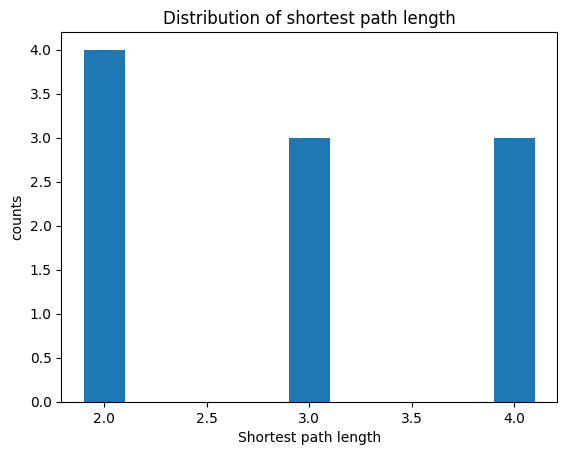

In [ ]:
### Plotting the histogram which shows the distribution of shortest path length

import matplotlib.pyplot as plt
shortest_path_length = [2,3,4]
frequency = [4,3,3]
plt.bar(shortest_path_length, frequency, width=0.2)

plt.xlabel("Shortest path length")
plt.ylabel("counts")
plt.title("Distribution of shortest path length")


##Discussion
The above plot shows the distribution of shortest path length for 10 pairs of random actors or actresses. From the plot it is clear that the shortest path length in the network is small i.e. it is a small world.

The average path length (APL) is given by:

$$
APL = \frac{\text{sum of shortest paths}}{\text{Total no. of pairs}}
$$

$$
 = \frac{(2 \times 4) + (3 \times 3) + (4 \times 3)}{10} = 2.9
$$


Therefore, the average path length is found to be 2.9. It indicates that nodes (i.e actor or actresses) in the network are relatively close to each other which reflects a real world network.

## References

1) Small World Networks, <https://www.jsums.edu/nmeghanathan/files/2015/08/CSC641-Fall2015-Module-6-Small-World-Networks-reduced.pdf>
